In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

import numpy as np

In [3]:
# Reemplaza 'cars.csv' con la ruta de tu archivo de datos
data = pd.read_csv('cars.csv', delimiter=';')
data.drop(['Tiempo', 'EDAD_COCHE'], axis=1, inplace=True)
data.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,0,2,18
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,NO,Medio-Bajo,SI,No,NO,1376,7187,0,2,53
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO,Medio,NO DATA,No,NO,1376,0,1,4,21
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,NO,Medio,SI,Averia muy grave,SI,2015,7256,1,4,48
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,SI,Alto,NO DATA,No,NO,1818,0,1,3,21


In [4]:
data.isnull().sum()

CODE                   0
PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia_              0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona _Renta        13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad Cliente           0
dtype: int64

## Columnas categóricas a numéricas

In [5]:
# Identificar las columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

# Usar LabelEncoder para convertir las columnas categóricas en numéricas
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))


## Separar los datos en X e Y

In [6]:
# Separar las características (X) de la variable objetivo (y)
X = data.drop('Mas_1_coche', axis=1)  # Asegúrate de que 'Mas_1_coche' sea el nombre de la columna objetivo
y = data['Mas_1_coche']

Dividimos los datos de entrenamiento y prueba

In [7]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Creamos modelo RandomForest

In [8]:
# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators=250, max_depth=5, min_samples_split=5, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)

## Realizamos predicciones y evaluamos modelo

In [9]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.805770887166236
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      8338
           1       0.86      0.37      0.52      3272

    accuracy                           0.81     11610
   macro avg       0.83      0.67      0.70     11610
weighted avg       0.81      0.81      0.78     11610



## Predicioneas sobre los nuevos datos

In [10]:
ndf = pd.read_csv('cars_input.csv', delimiter=';')

In [11]:
# Preprocesar el nuevo conjunto de datos
for column in categorical_columns:
    if column in ndf.columns:
        # Detectar nuevas categorías
        categorias_vistas = set(label_encoders[column].classes_)
        categorias_nuevas = set(ndf[column].astype(str).unique()) - categorias_vistas
        
        if categorias_nuevas:
            print(f"Column '{column}' contains new categories: {categorias_nuevas}")

            # Asignar una categoría especial "Desconocido" para las nuevas categorías
            ndf[column] = ndf[column].apply(lambda x: x if x in categorias_vistas else 'Desconocido')
            
            # Añadir la categoría "Desconocido" a las clases del LabelEncoder
            label_encoders[column].classes_ = np.append(label_encoders[column].classes_, 'Desconocido')

        # Transformar la columna categórica usando el LabelEncoder entrenado
        ndf[column] = label_encoders[column].transform(ndf[column].astype(str))


Column 'CODE' contains new categories: {'CLIN9214', 'CLIN14834', 'CLIN15648', 'CLIN2201', 'CLIN19297', 'CLIN19332', 'CLIN13492', 'CLIN2484', 'CLIN21197', 'CLIN21813', 'CLIN9035', 'CLIN18212', 'CLIN2434', 'CLIN606', 'CLIN12252', 'CLIN18104', 'CLIN7589', 'CLIN452', 'CLIN10521', 'CLIN15389', 'CLIN5762', 'CLIN20312', 'CLIN13220', 'CLIN4727', 'CLIN5902', 'CLIN2790', 'CLIN10359', 'CLIN2450', 'CLIN11471', 'CLIN3074', 'CLIN4530', 'CLIN16768', 'CLIN16789', 'CLIN21439', 'CLIN4461', 'CLIN10451', 'CLIN11971', 'CLIN20440', 'CLIN20708', 'CLIN16897', 'CLIN6548', 'CLIN16447', 'CLIN13438', 'CLIN3456', 'CLIN15844', 'CLIN22379', 'CLIN8881', 'CLIN18116', 'CLIN21393', 'CLIN9658', 'CLIN18425', 'CLIN351', 'CLIN8661', 'CLIN9132', 'CLIN10164', 'CLIN12602', 'CLIN17462', 'CLIN19869', 'CLIN153', 'CLIN10101', 'CLIN6231', 'CLIN9974', 'CLIN11258', 'CLIN3658', 'CLIN3546', 'CLIN7085', 'CLIN7658', 'CLIN18282', 'CLIN8960', 'CLIN14287', 'CLIN7135', 'CLIN6472', 'CLIN1165', 'CLIN19728', 'CLIN22768', 'CLIN16021', 'CLIN4955'

In [12]:
# Encontrar las columnas faltantes en el nuevo conjunto de datos
columnas_faltantes = set(X_train.columns) - set(ndf.columns)
print(f"Columnas faltantes en el nuevo conjunto de datos: {columnas_faltantes}")


Columnas faltantes en el nuevo conjunto de datos: set()


In [13]:
# Asegúrate de que el nuevo conjunto de datos tenga las mismas columnas que X_train
X_nuevo = ndf[X_train.columns]  # Utiliza las mismas características que en el entrenamiento
X_train.columns

Index(['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia_',
       'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn',
       'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona _Renta',
       'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno',
       'Revisiones', 'Edad Cliente'],
      dtype='object')

In [14]:
# Realizar predicciones con el modelo entrenado
y_nuevo_pred = model.predict(X_nuevo)

In [15]:
# Realizar predicciones con el modelo entrenado
y_nuevo_pred = model.predict(X_nuevo)

# Mostrar las primeras predicciones
print("Predicciones en el nuevo conjunto de datos:", y_nuevo_pred[:10])


Predicciones en el nuevo conjunto de datos: [0 0 0 1 0 0 0 0 0 0]


Como no tenemos datos para comparar las predicciones, vemos qué nos ha predicho el propio modelo

In [17]:
# Realizar validación cruzada en el conjunto de datos original
cv_scores = cross_val_score(model, X, y, cv=5)  # cv=5 para 5-fold cross-validation
cv_scores_mean = cv_scores.mean()

print(f"Validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores_mean}")

Validation accuracy scores: [0.77777778 0.80637382 0.79793282 0.80387597 0.79662331]
Mean cross-validation accuracy: 0.7965167376969768


In [18]:
# Comprobación el puntaje del entrenamiento
print(f"Puntaje de Entrenamiento: {train_score}")
print(f"Puntaje de validación cruzada: {cv_scores_mean}")

Puntaje de Entrenamiento: 0.7977777299252783
Puntaje de validación cruzada: 0.7965167376969768


In [19]:
# Interpretación de los puntajes
if train_score > cv_scores_mean*1.2:
    print("El modelo está sobreajustado.")
else:
    print("El modelo parece estar bien generalizado.")

El modelo parece estar bien generalizado.


## Curva ROC

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [21]:
# Obtener las probabilidades predichas para la clase positiva
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

In [22]:
# Calcular las tasas de verdaderos positivos (TPR) y falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [23]:
# Calcular el AUC
roc_auc = auc(fpr, tpr)

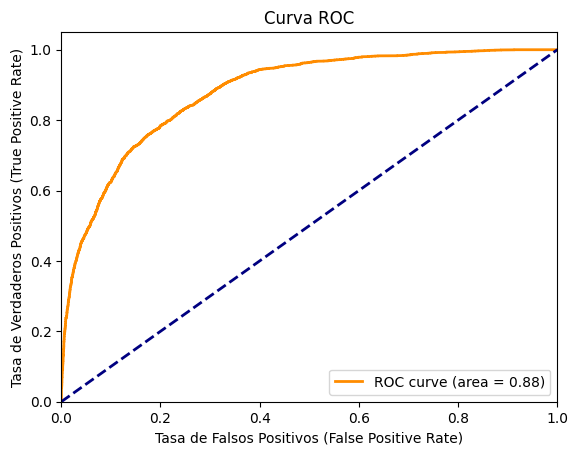

In [24]:
# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (clasificación aleatoria)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Tasa de Verdaderos Positivos (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()